#  Linear Regression - Task 2

## Importing Libraries

In [1]:
import numpy as sj
import pandas as ko
import matplotlib.pyplot as plt
import seaborn as bns

<b>Modules imported Successfully

## Importing Dataset

In [2]:
df=ko.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

<b>Data imported successfully

In [3]:
print("Head of the Data")
df.head(10)

Head of the Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
print("Datatypes of each data in dataset")
df.dtypes

Datatypes of each data in dataset


Hours     float64
Scores      int64
dtype: object

In [5]:
print("Information of Dataset")

df.info()

Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
print("Description of Dataset")
df.describe()

Description of Dataset


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
print("Shape of Dataset")
df.shape

Shape of Dataset


(25, 2)

In [8]:
print("Correlation of Dataset")
df.corr()

Correlation of Dataset


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
print("Mean of Dataset")
df["Hours"].mean()

Mean of Dataset


5.012

In [10]:
print("Median of dataset")
df["Hours"].median()

Median of dataset


4.8

In [11]:
print("Check any empty observations")
df.isnull().sum()

Check any empty observations


Hours     0
Scores    0
dtype: int64

## Scatterplot

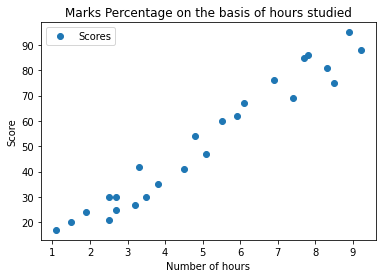

In [12]:
df.plot(x="Hours", y="Scores", style="o")
plt.title("Marks Percentage on the basis of hours studied") 
plt.xlabel('Number of hours')
plt.ylabel('Score')
plt.show()

## Barplot

Text(0, 0.5, 'Scores')

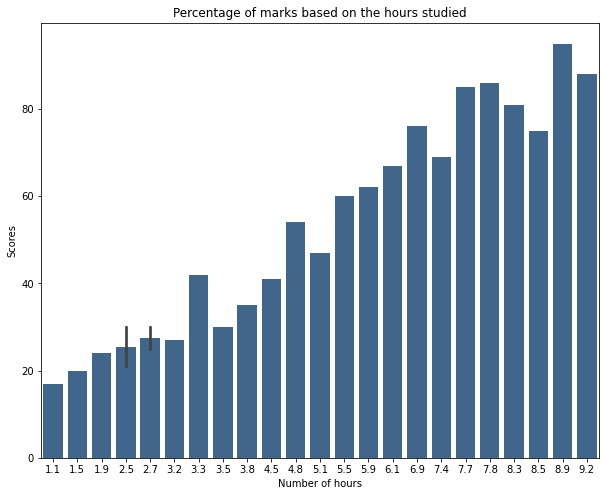

In [13]:
plt.figure(figsize=(10,8))
bns.barplot(df['Hours'],df['Scores'], color=(0.2, 0.4, 0.6, 0.6))
plt.title("Percentage of marks based on the hours studied")
plt.xlabel("Number of hours")
plt.ylabel("Scores")

## Boxplot

Text(0.5, 1.0, 'Percentage of marks based on the hours studied')

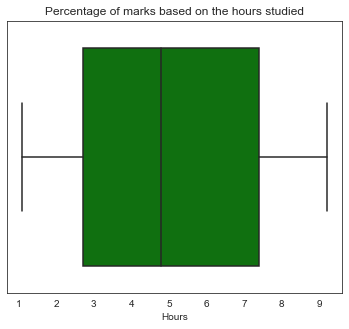

In [14]:
bns.set_style('white')
plt.figure(figsize=(6,5))
bns.boxplot(df["Hours"], color='green')
plt.title("Percentage of marks based on the hours studied")

Text(0.5, 1.0, 'Percentage of marks based on the hours studied')

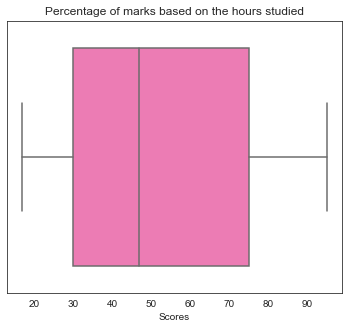

In [15]:
plt.figure(figsize=(6,5))
bns.boxplot(df["Scores"], color='hotpink')
plt.title("Percentage of marks based on the hours studied")

## Residual Plot

Text(0.5, 1.0, 'Percentage of marks based on the hours studied')

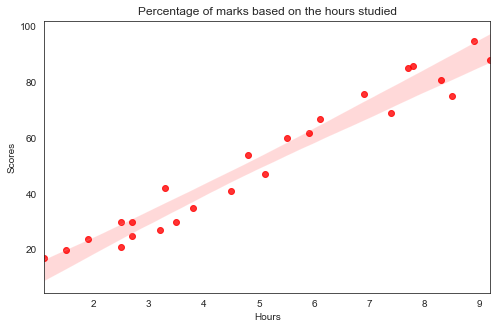

In [16]:
plt.figure(figsize=(8,5))
bns.regplot(x=df["Hours"], y=df["Scores"], color="Red")
plt.title("Percentage of marks based on the hours studied")

## Set the values for x and y

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Dataset is splitted into Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training set is training

In [21]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
s=regressor.coef_
j=regressor.intercept_
print("Intercept", j)
print("Coefficient of slope", s)

Intercept 2.0181600414346974
Coefficient of slope [9.91065648]


In [23]:
line=regressor.coef_*X+regressor.intercept_

## Displaying the results of Training set

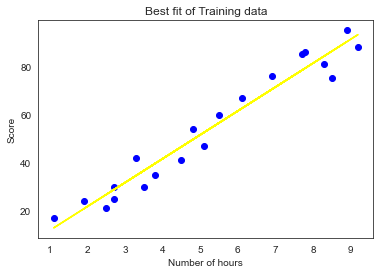

In [24]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='yellow')
plt.title("Best fit of Training data")
plt.xlabel('Number of hours')
plt.ylabel('Score')
plt.show()

## Displaying the results of Test set

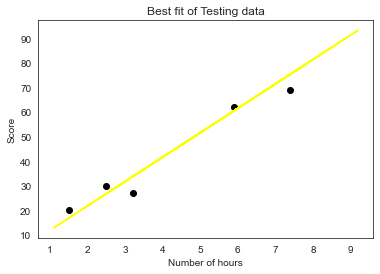

In [25]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_train, regressor.predict(X_train), color='yellow')
plt.title("Best fit of Testing data")
plt.xlabel('Number of hours')
plt.ylabel('Score')
plt.show()

## Preparing Predictions

In [26]:
print(X_test)
y_pred=regressor.predict(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


## Comparing Predictions vs Actual

In [27]:
ck=ko.DataFrame({'Actual': y_test,'Predictions': y_pred})
ck

,Actual,Predictions
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluation the Model

In [28]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("Hours studied= {}".format(hours))
print("Score Predicted = {}".format(own_pred[0]))

Hours studied= [[9.25]]
Score Predicted = 93.69173248737535


In [29]:
from sklearn import metrics
print('Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

Absolute Error:  4.183859899002975


In [30]:
print("R2 Score: " , metrics.r2_score(y_test, y_pred))

R2 Score:  0.9454906892105355


In [31]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [32]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [33]:
predics=regressor.predict(X)

In [34]:
R2=metrics.r2_score(y, predics)
R2

0.9526947647057274